<function matplotlib.pyplot.show(close=None, block=None)>

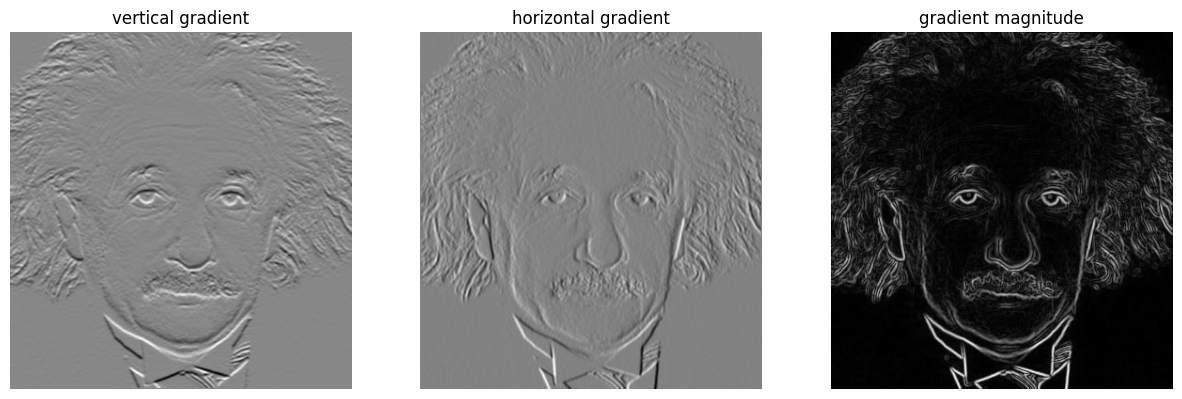

In [1]:
# Part A

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"a1images/a1images/einstein.png", cv.IMREAD_COLOR)
assert img is not None, "file could not be read, check with os.path.exists()"

I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
I = np.float32(I)

#define sobel kernels
sobel_h = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]] , dtype = np.float32)
sobel_v = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]] , dtype = np.float32)

#apply sobel kernels
Ix = cv.filter2D(I , -1 , sobel_v)
Iy = cv.filter2D(I , -1 , sobel_h)

#calculate gradient magnitude
gradient = np.sqrt(Ix**2 + Iy**2)

#plot images
fig , ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(Ix, cmap='gray')
ax[0].set_title('vertical gradient')
ax[0].axis('off')
ax[1].imshow(Iy, cmap='gray')   
ax[1].set_title('horizontal gradient')
ax[1].axis('off')
ax[2].imshow(gradient, cmap='gray')
ax[2].set_title('gradient magnitude')
ax[2].axis('off')
plt.show



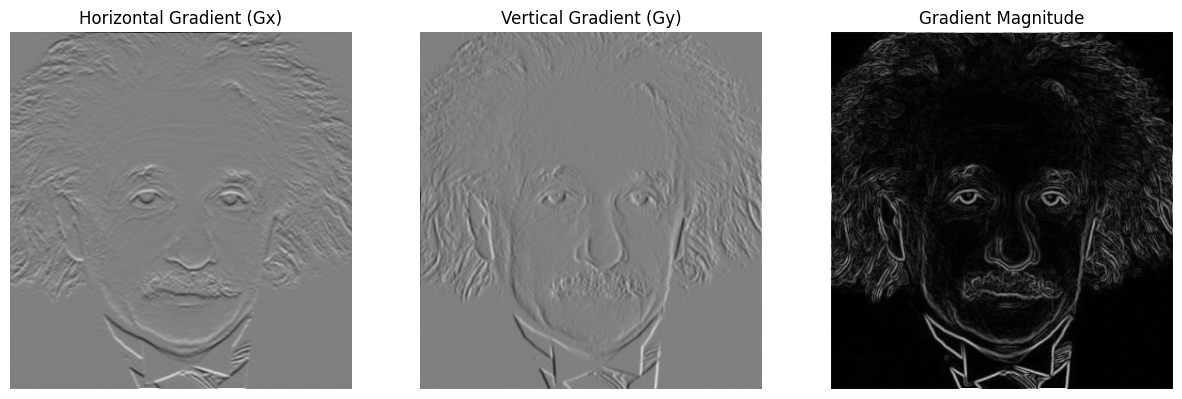

In [2]:
# part B

row, col = I.shape

# Padding the image
top, bottom, left, right = 1, 1, 1, 1 
padded_img = cv.copyMakeBorder(I, top, bottom, left, right, cv.BORDER_CONSTANT, value=0)

# Initialize output images for Gx, Gy, and gradient magnitude
Gx = np.zeros((row, col), dtype=np.float32)
Gy = np.zeros((row, col), dtype=np.float32)
G = np.zeros((row, col), dtype=np.float32)  

for i in range(1, row + 1):
    for j in range(1, col + 1):
        # Sobel filter for Gx
        Gx[i-1, j-1] = (padded_img[i-1, j-1] + 2*padded_img[i-1, j] + padded_img[i-1, j+1]) - \
                       (padded_img[i+1, j-1] + 2*padded_img[i+1, j] + padded_img[i+1, j+1])
        
        # Sobel filter for Gy
        Gy[i-1, j-1] = (padded_img[i-1, j-1] + 2*padded_img[i, j-1] + padded_img[i+1, j-1]) - \
                       (padded_img[i-1, j+1] + 2*padded_img[i, j+1] + padded_img[i+1, j+1])
        
        # Compute the gradient magnitude without clipping
        G_value = np.sqrt(Gx[i-1, j-1]**2 + Gy[i-1, j-1]**2)
        G[i-1, j-1] = G_value

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(Gx, cmap='gray', vmin=-1020, vmax=1020)
ax[0].set_title('Horizontal Gradient (Gx)')
ax[0].axis('off')
ax[1].imshow(Gy, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title('Vertical Gradient (Gy)')
ax[1].axis('off')
ax[2].imshow(G, cmap='gray', vmin=0, vmax=G.max())
ax[2].set_title('Gradient Magnitude')
ax[2].axis('off')
plt.show()

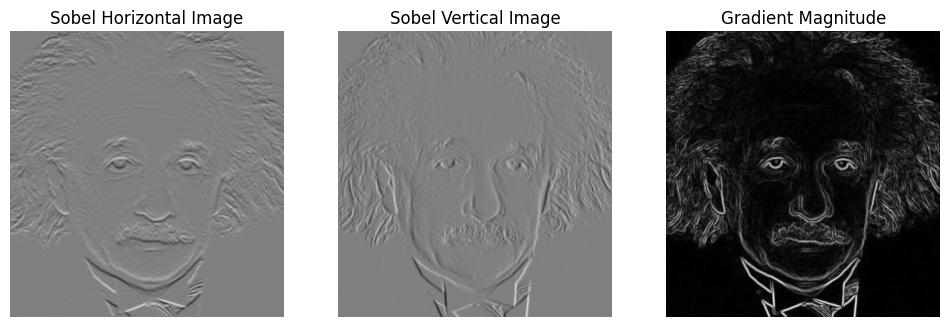

In [3]:
# Part C

# Define Sobel kernels
sobel_h_kernel = np.array([1, 2, 1], dtype=np.float32)  # Horizontal kernel
sobel_v_kernel = np.array([1, 0, -1], dtype=np.float32)  # Vertical kernel

# Apply the Sobel filter using separate filtering
Ix = cv.sepFilter2D(I, -1, sobel_h_kernel, sobel_v_kernel)  # Sobel vertical
Iy = cv.sepFilter2D(I, -1, sobel_v_kernel, sobel_h_kernel)  # Sobel horizontal

G = np.sqrt(Ix**2 + Iy**2)

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(Ix, cmap='gray', vmin=-1020, vmax=1020)
ax[0].set_title("Sobel Horizontal Image")
ax[0].axis("off")

ax[1].imshow(Iy, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("Sobel Vertical Image")
ax[1].axis("off")

ax[2].imshow(G, cmap='gray', vmin=0, vmax=G.max())
ax[2].set_title("Gradient Magnitude")
ax[2].axis("off")

plt.show()